In [42]:
from forex_python.converter import CurrencyRates
import matplotlib.pyplot as plt
from narcos.kiva_data import KivaData
import requests
from narcos.fixer_config import access_key
import json
import numpy as np


In [43]:
from narcos.kiva_data import KivaData
from forex_python.converter import CurrencyRates
from functools import partial
import seaborn as sns

In [44]:
kiva_data = KivaData(use_sample=True)
df = kiva_data.loan_data

df.head(1)

,Unnamed: 0,Unnamed: 0.1,id,funded_amount,loan_amount,activity,sector,use,country_code,country,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,gender,funded_amount_usd,loan_amount_usd
0,6883,264956,912251,575.0,975.0,Grocery Store,Food,"to buy more products such as meats, sausages, ...",HN,Honduras,...,NaT,20.0,19,"user_favorite, #Single, #Supporting Family",male,monthly,2015-07-02,male,575.0,975.0


       country  loan_amount  loan_ranked
0       Belize       1375.0          2.0
1        Benin       3925.0          4.0
2      Somalia       1500.0          3.0
3  South Sudan        825.0          1.0


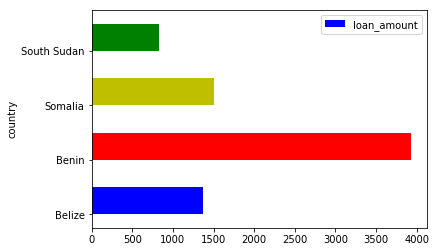

In [53]:

country_df = df[['country','loan_amount']].groupby("country").sum()
country_df['loan_ranked'] = df[['country','loan_amount']].groupby("country").sum().rank(ascending=True)
country_df_filtered = country_df[country_df['loan_ranked'] <5]
#c = country_df.groupby("country").agg('sum')[['loan_amount']]/100000
country_df_filtered.reset_index(inplace=True)
print(country_df_filtered)

country_df_filtered.plot.barh(x='country',y='loan_amount', color=['b','r', 'y','g',], align='edge')

plt.show()

In [18]:
#df.groupby('gender').agg('count')[['loan_amount']].plot.pie(y='loan_amount')
#plt.show()
def plot_country_by_loan_amount():
    country_df = df[['country','loan_amount']]
    c = country_df.groupby("country").agg('sum')[['loan_amount']]/100000

    c = c.reset_index()
    #print(c.head())
    print(len(c))

#    x_axis = np.arange(len(c['country']))
#    #plt.bar(c['country'], c['loan_amount'], color='b', align='edge')
#    for x,y in zip(x_axis,c['loan_amount']):
#        plt.text(x+0.001, y+0.005, '%.2f'%y)
             
    c.plot.barh(x='country',y='loan_amount', color='b', align='edge')

#    tick_locations = [value+0.1 for value in x_axis]
#    plt.xticks(tick_locations, c['country'])
    plt.show()


77


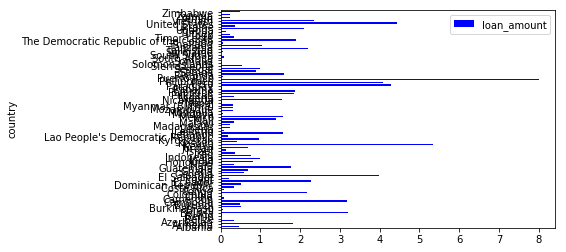

In [19]:
plot_country_by_loan_amount()